<a href="https://colab.research.google.com/github/jhlee508/Colab/blob/master/ML_Randomforest_iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Loading iris dataset

In [ ]:
iris = load_iris()

In [ ]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
iris_df = pd.DataFrame(data= np.c_[iris['data'], iris['target']], columns = iris['feature_names'] + ['target'])
iris_df

sepal length (cm)  sepal width (cm)  ...  petal width (cm)  target
0                  5.1               3.5  ...               0.2     0.0
1                  4.9               3.0  ...               0.2     0.0
2                  4.7               3.2  ...               0.2     0.0
3                  4.6               3.1  ...               0.2     0.0
4                  5.0               3.6  ...               0.2     0.0
..                 ...               ...  ...               ...     ...
145                6.7               3.0  ...               2.3     2.0
146                6.3               2.5  ...               1.9     2.0
147                6.5               3.0  ...               2.0     2.0
148                6.2               3.4  ...               2.3     2.0
149                5.9               3.0  ...               1.8     2.0

[150 rows x 5 columns]

In [ ]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
iris_df['target'] = iris_df['target'].map({0:'setosa', 1:'versicolor', 2:'virginica'})

In [ ]:
iris_df

sepal length (cm)  sepal width (cm)  ...  petal width (cm)     target
0                  5.1               3.5  ...               0.2     setosa
1                  4.9               3.0  ...               0.2     setosa
2                  4.7               3.2  ...               0.2     setosa
3                  4.6               3.1  ...               0.2     setosa
4                  5.0               3.6  ...               0.2     setosa
..                 ...               ...  ...               ...        ...
145                6.7               3.0  ...               2.3  virginica
146                6.3               2.5  ...               1.9  virginica
147                6.5               3.0  ...               2.0  virginica
148                6.2               3.4  ...               2.3  virginica
149                5.9               3.0  ...               1.8  virginica

[150 rows x 5 columns]

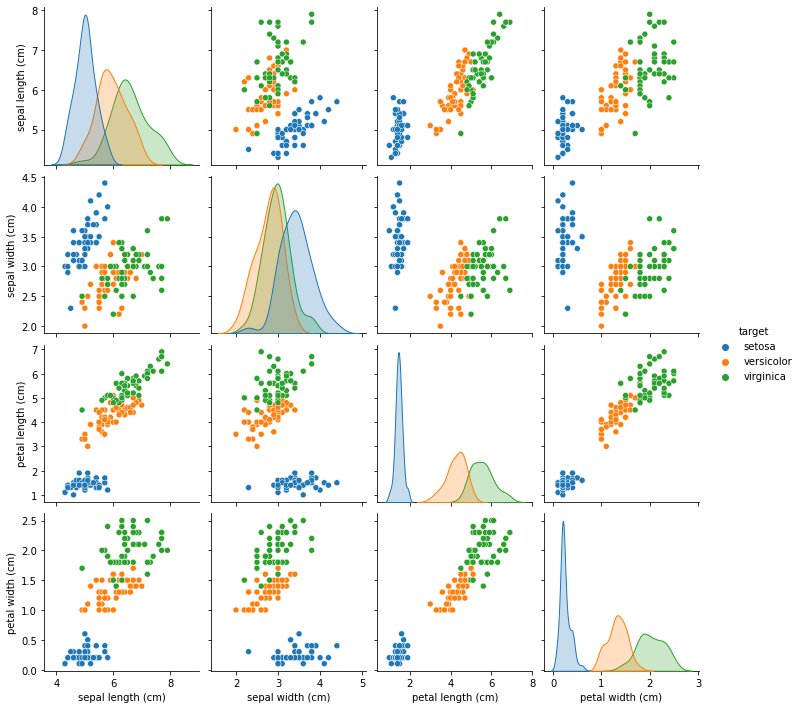

In [ ]:
sns.pairplot(iris_df, hue = 'target')
plt.show()

# Train Test Split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(iris['data'], iris['target'], test_size=0.20, stratify = iris['target'])

# Modeling(Randomforest Classifier)

In [ ]:
rf = RandomForestClassifier(min_samples_leaf=1)

In [ ]:
rf.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
predicted = rf.predict(X_test)
accuracy = accuracy_score(Y_test, predicted)
print('Mean accuracy score : {:.2f}'.format(accuracy))
print(predicted==Y_test)

Mean accuracy score : 0.97
[ True  True False  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True]


In [ ]:
rf.estimators_

[DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=None, max_features='auto', max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=30841913, splitter='best'),
 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=None, max_features='auto', max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=49368938, splitter='best'),
 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=None, max_

# Visualizing the first decision tree

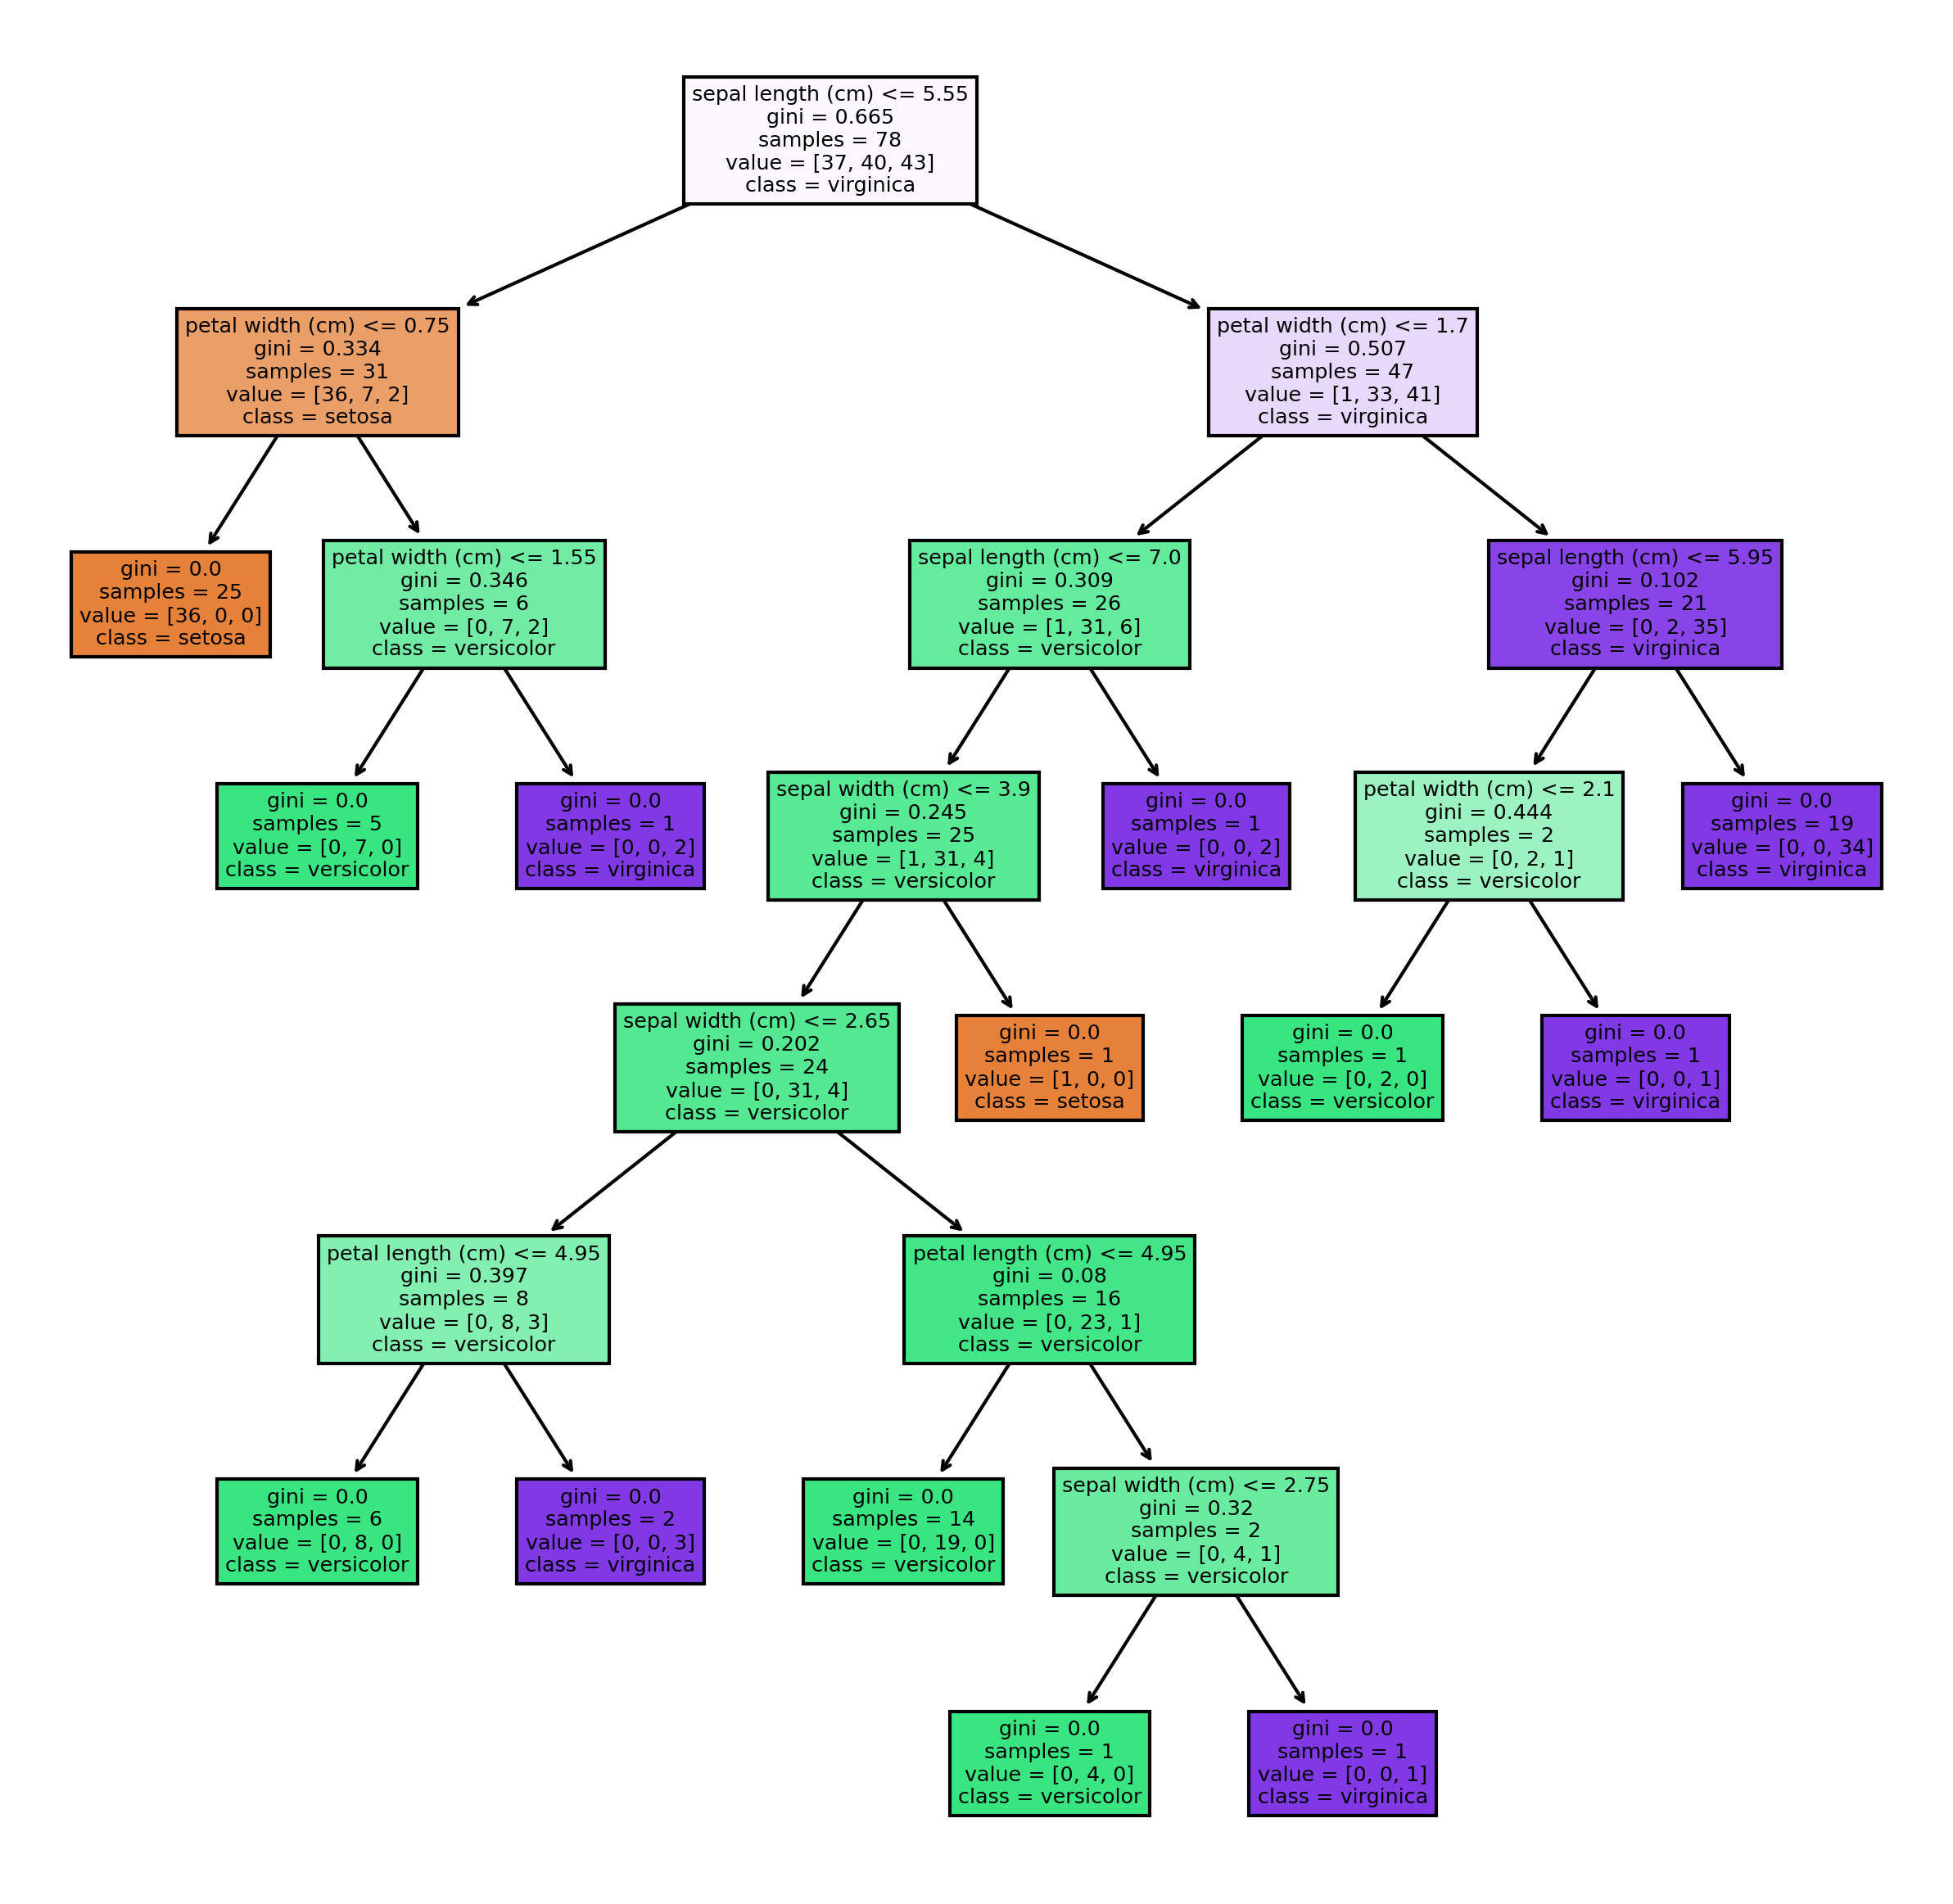

In [ ]:
fn = iris.feature_names
cn = iris.target_names
f, ax = plt.subplots(1, 1, figsize = (10, 10), dpi=300)
tree.plot_tree(rf.estimators_[0],
               feature_names = fn, 
               class_names=cn,
               filled = True);

# Visualizing Several Individual Trees in Randomforest

In [ ]:
fn = iris.feature_names
cn = iris.target_names
f, ax = plt.subplots(1, 5, figsize = (10, 2), dpi = 300)
for index in range(0, 5):
    tree.plot_tree(rf.estimators_[index],
                   feature_names = fn, 
                   class_names=cn,
                   filled = True,
                   ax = ax[index]);
    
    ax[index].set_title('Estimator: ' + str(index), fontsize = 11)

# Deep Learning Model

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

In [ ]:
Y_train

array([1, 0, 2, 1, 0, 0, 1, 0, 1, 0, 2, 0, 1, 2, 0, 0, 2, 2, 2, 0, 0, 2,
       0, 2, 1, 0, 0, 2, 2, 2, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 2, 1, 1, 1,
       0, 0, 2, 2, 0, 2, 2, 1, 2, 1, 0, 1, 0, 1, 2, 0, 0, 2, 1, 1, 2, 2,
       0, 1, 0, 2, 2, 1, 2, 2, 0, 2, 1, 1, 2, 0, 0, 2, 1, 1, 2, 0, 2, 2,
       1, 0, 1, 1, 1, 0, 2, 2, 0, 0, 1, 2, 1, 0, 2, 1, 0, 1, 0, 2, 1, 1,
       0, 2, 2, 1, 0, 2, 0, 1, 2, 1])

In [ ]:
Y_train_encoded = to_categorical(Y_train)
Y_test_encoded = to_categorical(Y_test)

In [ ]:
X_train = X_train.astype(float)
X_test = X_test.astype(float)

In [ ]:
model = Sequential()
model.add(Dense(16, input_dim=4, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 16)                80        
_________________________________________________________________
dense_19 (Dense)             (None, 3)                 51        
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.fit(X_train, Y_train_encoded, batch_size = 1, epochs=50)

Epoch 1/50
120/120 [==============================] - 0s 786us/step - loss: 2.2250 - accuracy: 0.2832
Epoch 2/50
120/120 [==============================] - 0s 779us/step - loss: 1.1294 - accuracy: 0.1913
Epoch 3/50
120/120 [==============================] - 0s 748us/step - loss: 0.9792 - accuracy: 0.3997
Epoch 4/50
120/120 [==============================] - 0s 803us/step - loss: 0.8618 - accuracy: 0.6234
Epoch 5/50
120/120 [==============================] - 0s 835us/step - loss: 0.7828 - accuracy: 0.6277
Epoch 6/50
120/120 [==============================] - 0s 815us/step - loss: 0.6433 - accuracy: 0.7223
Epoch 7/50
120/120 [==============================] - 0s 842us/step - loss: 0.6024 - accuracy: 0.7226
Epoch 8/50
120/120 [==============================] - 0s 806us/step - loss: 0.5996 - accuracy: 0.6658
Epoch 9/50
120/120 [==============================] - 0s 804us/step - loss: 0.5548 - accuracy: 0.7651
Epoch 10/50
120/120 [==============================] - 0s 937us/step - loss: 0.528